# Exploring "YouTube Faces with Facial Keypoints" Dataset
In this script we will demonstrate how to access the files of "YouTube Faces with Facial Keypoints" dataset.  
We also perform basic cluster analysis of the shapes in the dataset.  

I will not hide any code in this script so that we get familiarized with the files, how to load them and how to present them.

![filmreel](http://kjmultimediasolutions.com/wp-content/uploads/2015/07/filmreel1.jpg)

This dataset is a processed version of the [YouTube Faces Dataset](https://www.cs.tau.ac.il/~wolf/ytfaces/), that basically contained short videos of celebrities that are publicly available and were downloaded from YouTube. There are multiple videos of each celebrity (up to 6 videos per celebrity).  
Additionally, for this kaggle version of the dataset I've extracted facial keypoints for each frame of each video using [this amazing 2D and 3D Face alignment library](https://github.com/1adrianb/face-alignment) that was recently published.  

For full description please read the description on the [dataset page](https://www.kaggle.com/selfishgene/youtube-faces-with-facial-keypoints).

In [1]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib
import glob
from sklearn import cluster

## Show the basic details of the videos in the dataset
In this particular case, show the "large" subset of the dataset that contains all videos of individuals with at least 3 different videos each.

In [2]:
videoDF = pd.read_csv('../input/youtube-faces-with-facial-keypoints/youtube_faces_with_keypoints_full.csv')
videoDF.head(15)

,videoID,personName,imageHeight,imageWidth,videoDuration,averageFaceSize,numVideosForPerson
0,Alison_Lohman_0,Alison_Lohman,228.0,213.0,240.0,90.150000,6.0
1,Alison_Lohman_1,Alison_Lohman,248.0,201.0,79.0,108.417722,6.0
2,Alison_Lohman_2,Alison_Lohman,335.0,308.0,136.0,122.161765,6.0
3,Alison_Lohman_3,Alison_Lohman,151.0,110.0,53.0,58.000000,6.0
4,Alison_Lohman_4,Alison_Lohman,236.0,228.0,147.0,91.680272,6.0
5,Alison_Lohman_5,Alison_Lohman,227.0,179.0,68.0,105.647059,6.0
6,Kevin_Spacey_0,Kevin_Spacey,196.0,264.0,91.0,99.912088,6.0
7,Kevin_Spacey_1,Kevin_Spacey,260.0,217.0,59.0,120.186441,6.0
8,Kevin_Spacey_2,Kevin_Spacey,186.0,175.0,71.0,86.746479,6.0
9,Kevin_Spacey_3,Kevin_Spacey,100.0,89.0,99.0,44.636364,6.0


Each video in the dataset is defined by the "video ID" field.  
For each videoID there exists an "videoID.npz" (e.g. "Kevin_Spacey_2.npz") that are divided among the archive files.  

* First, since there are multiple archive files with different names we will create a map between the videoID and the full filepath with which we can load the data.
* Then, we will then remove the rows in the videoDF dataframe that are yet to be uploaded to kaggle and keep only the rows of videos that have been uploaded already

In [3]:
# create a dictionary that maps videoIDs to full file paths
# single file cane be acessed using "../input/youtube-faces-with-facial-keypoints/youtube_faces_with_keypoints_full_1/youtube_faces_with_keypoints_full_1/AJ_Cook_0.npz"
npzFilesFullPath = glob.glob('../input/youtube-faces-with-facial-keypoints/youtube_faces_*/youtube_faces_*/*.npz')
videoIDs = [x.split('/')[-1].split('.')[0] for x in npzFilesFullPath]
fullPaths = {}
for videoID, fullPath in zip(videoIDs, npzFilesFullPath):
    fullPaths[videoID] = fullPath

# remove from the large csv file all videos that weren't uploaded yet
# videoDF = videoDF.loc[videoDF.loc[:,'videoID'].isin(fullPaths.keys()),:].reset_index(drop=True)
print('Number of Videos is %d' %(videoDF.shape[0]))
print('Number of Unique Individuals is %d' %(len(videoDF['personName'].unique())))

Number of Videos is 2194
Number of Unique Individuals is 828


## Show Overview of Dataset Content
Again, right now it's the content of a subset of the dataset that was already uploaded.  
When the dataset size limitation will be lifted, I'll upload more videos. This will be automatically updated whenever I'll re-run the script.

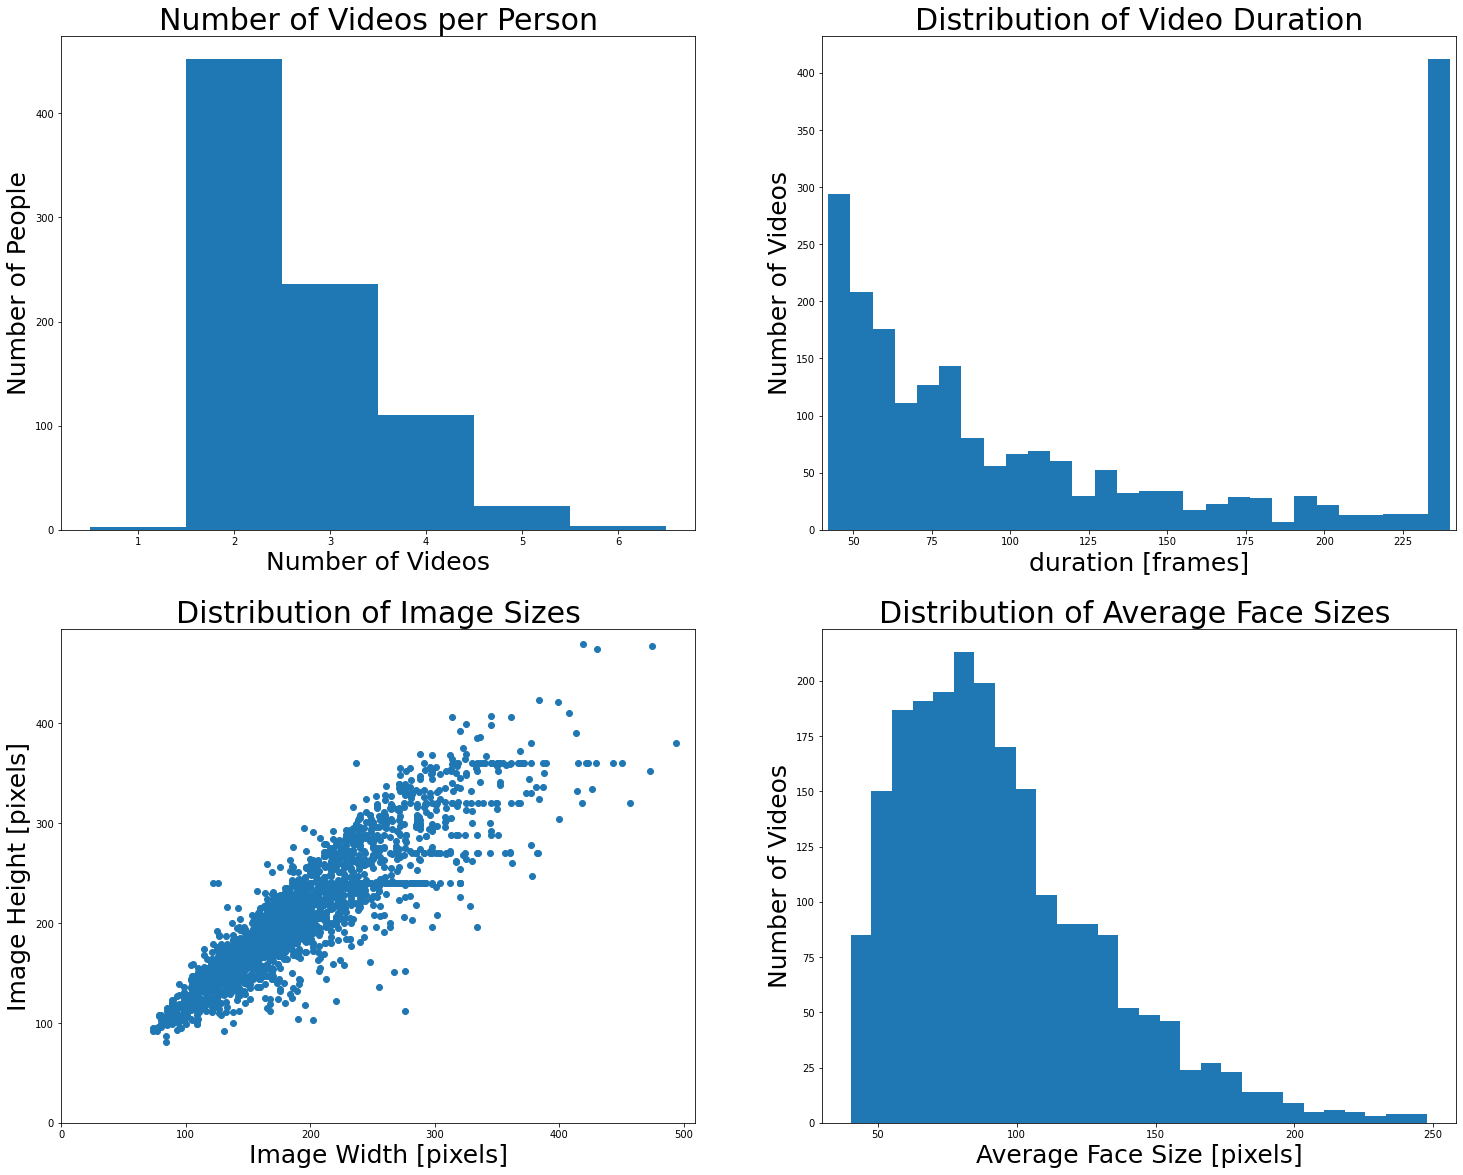

In [4]:
# overview of the contents of the dataset
groupedByPerson = videoDF.groupby("personName")
numVidsPerPerson = groupedByPerson.count()['videoID']
groupedByPerson.count().sort_values('videoID', axis=0, ascending=False)

plt.close('all')
plt.figure(figsize=(25,20))
plt.subplot(2,2,1)
plt.hist(x=numVidsPerPerson,bins=0.5+np.arange(numVidsPerPerson.min()-1,numVidsPerPerson.max()+1))
plt.title('Number of Videos per Person',fontsize=30); 
plt.xlabel('Number of Videos',fontsize=25); plt.ylabel('Number of People',fontsize=25)

plt.subplot(2,2,2)
plt.hist(x=videoDF['videoDuration'],bins=28);
plt.title('Distribution of Video Duration',fontsize=30); 
plt.xlabel('duration [frames]',fontsize=25); plt.ylabel('Number of Videos',fontsize=25)
plt.xlim(videoDF['videoDuration'].min()-2,videoDF['videoDuration'].max()+2)

plt.subplot(2,2,3)
plt.scatter(x=videoDF['imageWidth'], y=videoDF['imageHeight'])
plt.title('Distribution of Image Sizes',fontsize=30)
plt.xlabel('Image Width [pixels]',fontsize=25); plt.ylabel('Image Height [pixels]',fontsize=25)
plt.xlim(0,videoDF['imageWidth'].max() +15)
plt.ylim(0,videoDF['imageHeight'].max()+15)

plt.subplot(2,2,4)
averageFaceSize_withoutNaNs = np.array(videoDF['averageFaceSize'])
averageFaceSize_withoutNaNs = averageFaceSize_withoutNaNs[np.logical_not(np.isnan(averageFaceSize_withoutNaNs))]
plt.hist(averageFaceSize_withoutNaNs, bins=28)
plt.title('Distribution of Average Face Sizes ',fontsize=30)
plt.xlabel('Average Face Size [pixels]',fontsize=25); plt.ylabel('Number of Videos',fontsize=25);


## 2D and 3D Landmarks Data
The best way to introduce the landmarks data is just to look at the following video:

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo('8FdSHl4oNIM',width=640, height=480)

For further details on this really awsome work, please visit [this project page](https://www.adrianbulat.com/face-alignment/).  
The paper can be found [here](https://www.adrianbulat.com/downloads/FaceAlignment/FaceAlignment.pdf).  
The pytorch code can be found [here](https://github.com/1adrianb/face-alignment).  

**Note**: I'm in no way associated to any of these guys, just genuinely impressed.

## Show Images from YouTube Faces with 2D Keypoints Overlaid
This shows how to read the dataset and display it's main content

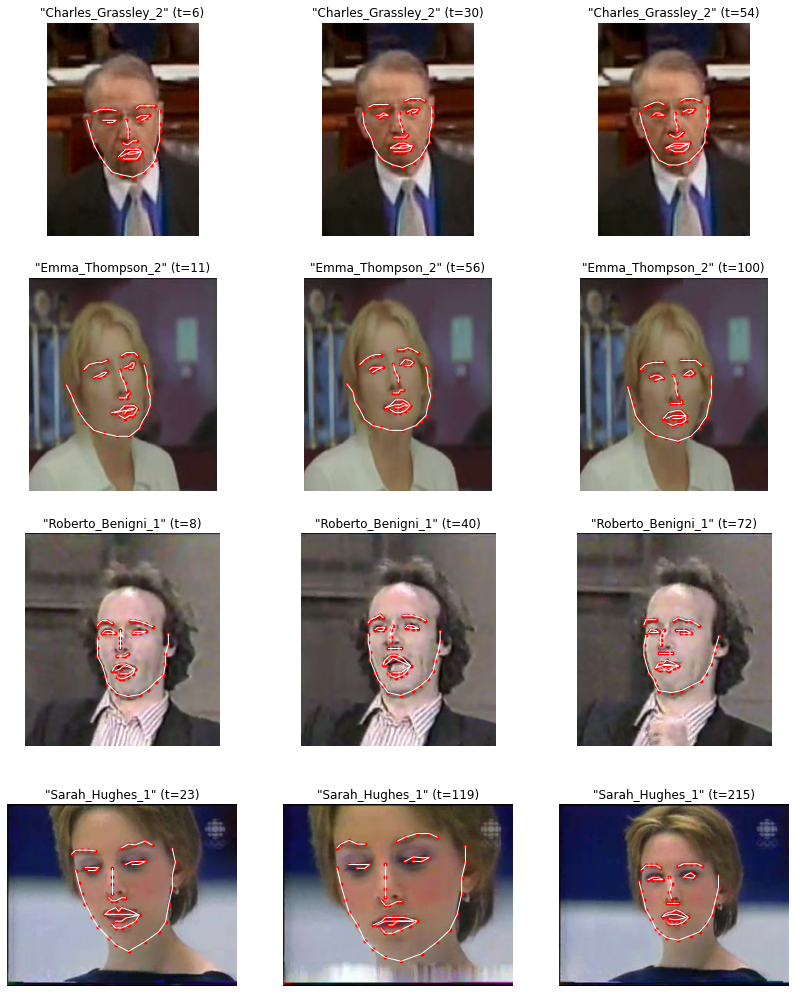

In [6]:
# show several frames from each video and overlay 2D keypoints
np.random.seed(3)
numVideos = 4
framesToShowFromVideo = np.array([0.1,0.5,0.9])
numFramesPerVideo = len(framesToShowFromVideo)

# define which points need to be connected with a line
jawPoints          = [ 0,17]
rigthEyebrowPoints = [17,22]
leftEyebrowPoints  = [22,27]
noseRidgePoints    = [27,31]
noseBasePoints     = [31,36]
rightEyePoints     = [36,42]
leftEyePoints      = [42,48]
outerMouthPoints   = [48,60]
innerMouthPoints   = [60,68]

listOfAllConnectedPoints = [jawPoints,rigthEyebrowPoints,leftEyebrowPoints,
                            noseRidgePoints,noseBasePoints,
                            rightEyePoints,leftEyePoints,outerMouthPoints,innerMouthPoints]

# select a random subset of 'numVideos' from the available videos
randVideoIDs = videoDF.loc[np.random.choice(videoDF.index,size=numVideos,replace=False),'videoID']

fig, axArray = plt.subplots(nrows=numVideos,ncols=numFramesPerVideo,figsize=(14,18))
for i, videoID in enumerate(randVideoIDs):
    # load video
    videoFile = np.load(fullPaths[videoID])
    colorImages = videoFile['colorImages']
    boundingBox = videoFile['boundingBox']
    landmarks2D = videoFile['landmarks2D']
    landmarks3D = videoFile['landmarks3D']

    # select frames and show their content
    selectedFrames = (framesToShowFromVideo*(colorImages.shape[3]-1)).astype(int)
    for j, frameInd in enumerate(selectedFrames):
        axArray[i][j].imshow(colorImages[:,:,:,frameInd])
        axArray[i][j].scatter(x=landmarks2D[:,0,frameInd],y=landmarks2D[:,1,frameInd],s=9,c='r')
        for conPts in listOfAllConnectedPoints:
            xPts = landmarks2D[conPts[0]:conPts[-1],0,frameInd]
            yPts = landmarks2D[conPts[0]:conPts[-1],1,frameInd]
            axArray[i][j].plot(xPts,yPts,c='w',lw=1)
        axArray[i][j].set_title('"%s" (t=%d)' %(videoID,frameInd), fontsize=12)
        axArray[i][j].set_axis_off()

We can see a small amount of imprefections in the keypoints predictions outputed by the alignment library, but overall this is really amazing performace.

## Show 3D Keypoints
Interestingly, this work can also extract 3D Keypoints, this shows how one can display the 3D landmarks

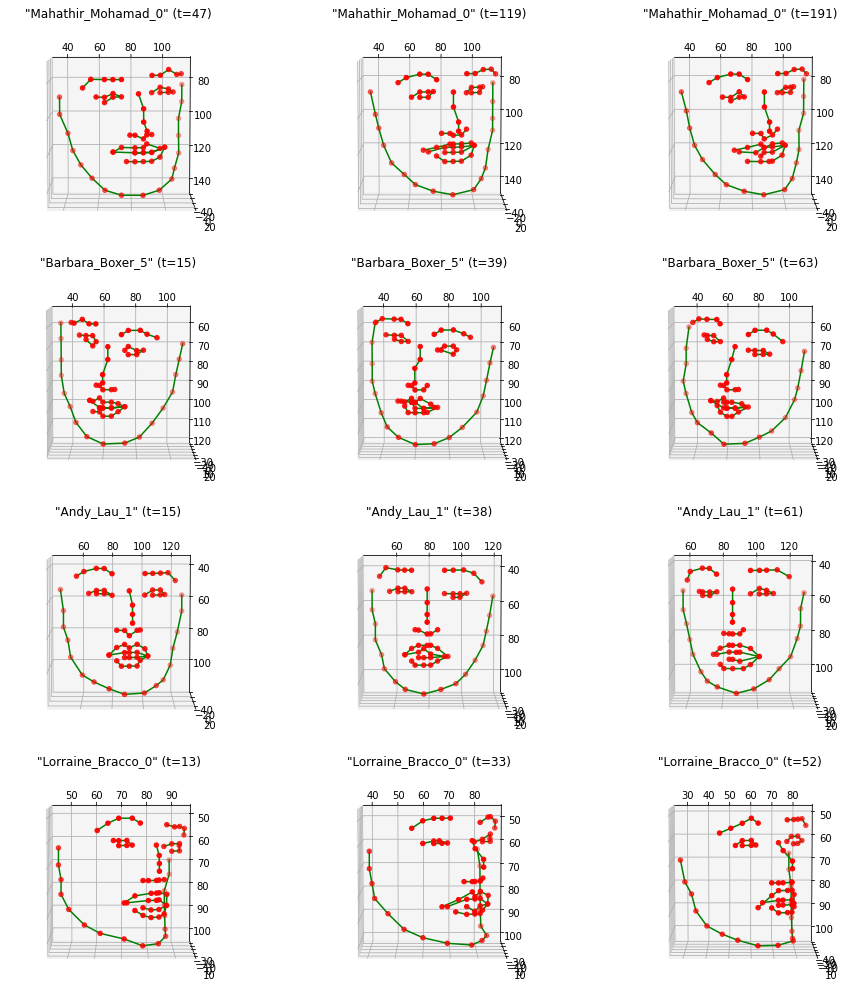

In [7]:
# show several 3D keypoints
numVideos = 4
framesToShowFromVideo = np.array([0.2,0.5,0.8])
numFramesPerVideo = len(framesToShowFromVideo)

# select a random subset of 'numVideos' from the available videos
randVideoIDs = videoDF.loc[np.random.choice(videoDF.index,size=numVideos,replace=False),'videoID']

fig = plt.figure(figsize=(14,14))
for i, videoID in enumerate(randVideoIDs):
    # load video
    videoFile = np.load(fullPaths[videoID])
    colorImages = videoFile['colorImages']
    boundingBox = videoFile['boundingBox']
    landmarks2D = videoFile['landmarks2D']
    landmarks3D = videoFile['landmarks3D']

    # select frames and show their content
    selectedFrames = (framesToShowFromVideo*(colorImages.shape[3]-1)).astype(int)
    for j, frameInd in enumerate(selectedFrames):
        subplotInd = i*numFramesPerVideo + j+1
        ax = fig.add_subplot(numVideos, numFramesPerVideo, subplotInd, projection='3d')
        ax.scatter(landmarks3D[:,0,frameInd], landmarks3D[:,1,frameInd], landmarks3D[:,2,frameInd],c='r')
        for conPts in listOfAllConnectedPoints:
            xPts = landmarks3D[conPts[0]:conPts[-1],0,frameInd]
            yPts = landmarks3D[conPts[0]:conPts[-1],1,frameInd]
            zPts = landmarks3D[conPts[0]:conPts[-1],2,frameInd]
            ax.plot3D(xPts,yPts,zPts,color='g')         
        ax.set_xlim(ax.get_xlim()[::-1])
        ax.view_init(elev=96, azim=90)
        ax.set_title('"%s" (t=%d)' %(videoID,frameInd), fontsize=12)
        
plt.tight_layout()

## Basic EDA
## Normalize 2D and 3D shapes

In [8]:
# collect all 2D and 3D shapes from all frames from all videos to a single numpy array matrix
totalNumberOfFrames = videoDF['videoDuration'].sum()
landmarks2D_all = np.zeros((68,2,int(totalNumberOfFrames)))
landmarks3D_all = np.zeros((68,3,int(totalNumberOfFrames)))

shapeIndToVideoID = {} # dictionary for later useage
endInd = 0
for i, videoID in enumerate(videoDF['videoID']):
    
    # load video
    videoFile = np.load(fullPaths[videoID])
    landmarks2D = videoFile['landmarks2D']
    landmarks3D = videoFile['landmarks3D']

    startInd = endInd
    endInd   = startInd + landmarks2D.shape[2]

    # store in one big array
    landmarks2D_all[:,:,startInd:endInd] = landmarks2D
    landmarks3D_all[:,:,startInd:endInd] = landmarks3D
    
    # make sure we keep track of the mapping to the original video and frame
    for videoFrameInd, shapeInd in enumerate(range(startInd,endInd)):
        shapeIndToVideoID[shapeInd] = (videoID, videoFrameInd)

# center the shapes around zero
# i.e. such that for each frame the mean x,y,z coordinates will be zero
# or in math terms: Xc = X - mean(X), Yc = Y - mean(Y), Zc = Z - mean(Z)
landmarks2D_centered = np.zeros(landmarks2D_all.shape)
landmarks2D_centered = landmarks2D_all - np.tile(landmarks2D_all.mean(axis=0),[68,1,1])

landmarks3D_centered = np.zeros(landmarks3D_all.shape)
landmarks3D_centered = landmarks3D_all - np.tile(landmarks3D_all.mean(axis=0),[68,1,1])

# normalize the shapes such that they have the same scale
# i.e. such that for each frame the mean euclidian distance from the shape center will be one
# or in math terms: mean( sqrt(dX^2 + dY^2 + dZ^2) ) = 1 
landmarks2D_normlized = np.zeros(landmarks2D_all.shape)
landmarks2D_normlized = landmarks2D_centered / np.tile(np.sqrt((landmarks2D_centered**2).sum(axis=1)).mean(axis=0), [68,2,1])

landmarks3D_normlized = np.zeros(landmarks3D_all.shape)
landmarks3D_normlized = landmarks3D_centered / np.tile(np.sqrt((landmarks3D_centered**2).sum(axis=1)).mean(axis=0), [68,3,1])

## Show 2D Shape Normalization stages

Text(0.5, 1.0, 'Normlized Shapes')

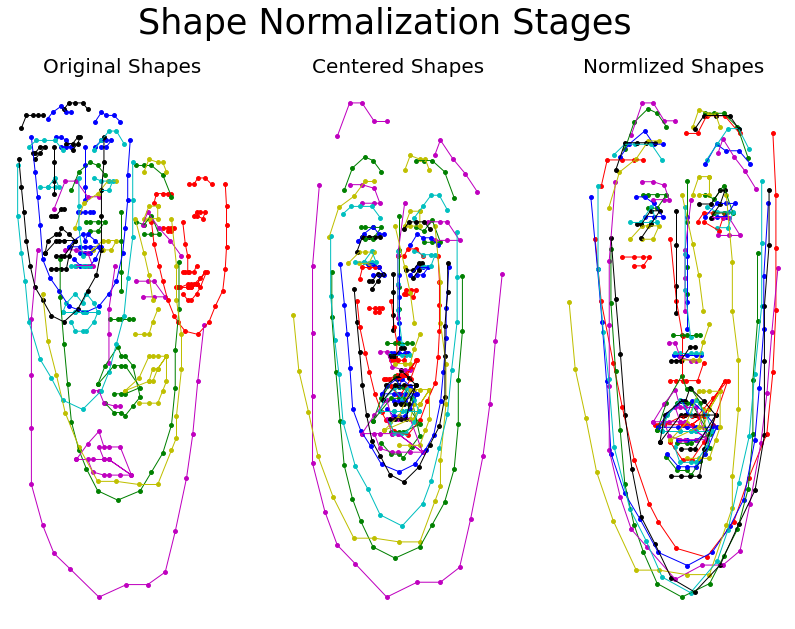

In [9]:
#%% check the 2D normalization and verify that everything is as expected
# select random several frames to be used as test cases
np.random.seed(2)

listOfShapeColors = ['r','g','b','m','y','c','k']
numShapesToPresent = len(listOfShapeColors)
listOfShapeInds = np.random.choice(range(int(totalNumberOfFrames)),size=numShapesToPresent,replace=False)

plt.close('all')
plt.figure(figsize=(14,10))
plt.suptitle('Shape Normalization Stages',fontsize=35)
plt.subplot(1,3,1)
for k,shapeInd in enumerate(listOfShapeInds):
    plt.scatter(landmarks2D_all[:,0,shapeInd], -landmarks2D_all[:,1,shapeInd], s=15, c=listOfShapeColors[k])
    for conPts in listOfAllConnectedPoints:
        xPts =  landmarks2D_all[conPts[0]:conPts[-1],0,shapeInd]
        yPts = -landmarks2D_all[conPts[0]:conPts[-1],1,shapeInd]
        plt.plot(xPts,yPts,c=listOfShapeColors[k],lw=1)
plt.axis('off'); plt.title('Original Shapes', fontsize=20)

plt.subplot(1,3,2)
for k,shapeInd in enumerate(listOfShapeInds):
    plt.scatter(landmarks2D_centered[:,0,shapeInd], -landmarks2D_centered[:,1,shapeInd], s=15, c=listOfShapeColors[k])
    for conPts in listOfAllConnectedPoints:
        xPts =  landmarks2D_centered[conPts[0]:conPts[-1],0,shapeInd]
        yPts = -landmarks2D_centered[conPts[0]:conPts[-1],1,shapeInd]
        plt.plot(xPts,yPts,c=listOfShapeColors[k],lw=1)
plt.axis('off'); plt.title('Centered Shapes', fontsize=20)

plt.subplot(1,3,3)
for k,shapeInd in enumerate(listOfShapeInds):
    plt.scatter(landmarks2D_normlized[:,0,shapeInd], -landmarks2D_normlized[:,1,shapeInd], s=15, c=listOfShapeColors[k])
    for conPts in listOfAllConnectedPoints:
        xPts =  landmarks2D_normlized[conPts[0]:conPts[-1],0,shapeInd]
        yPts = -landmarks2D_normlized[conPts[0]:conPts[-1],1,shapeInd]
        plt.plot(xPts,yPts,c=listOfShapeColors[k],lw=1)
plt.axis('off'); plt.title('Normlized Shapes', fontsize=20)

On the left we see that the original faces can appear anywhere in the frame, and have several different sizes.  
The centered images are at the same location, but with different sizes. The normlized faces on the right are approximatley same location and and same size. 

## Cluster all 2D shapes using Kmeans and show the resulting clusters

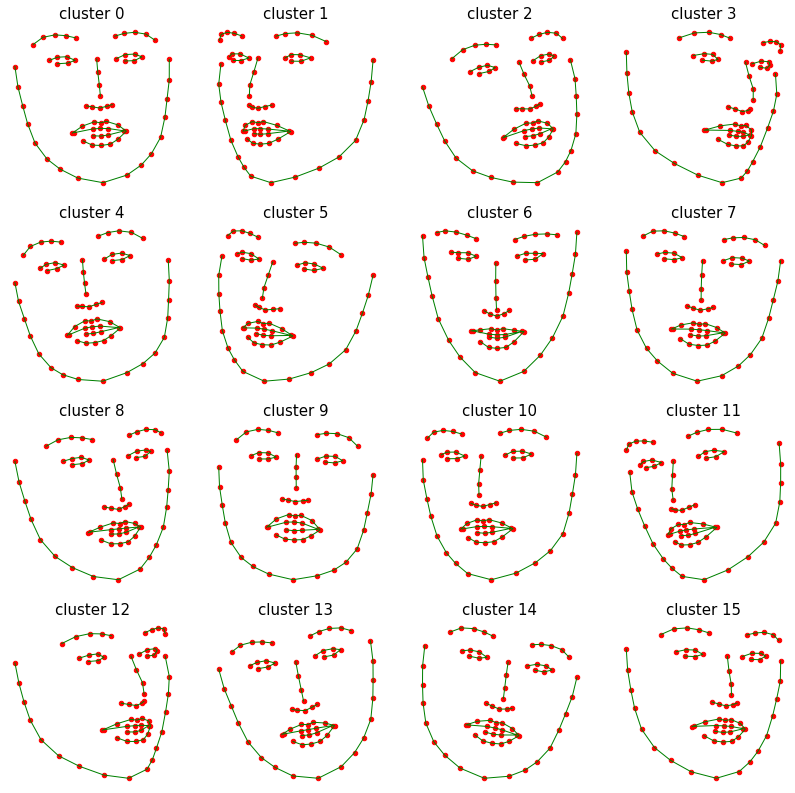

In [10]:
#%% cluster normalized shapes and show the cluster centers
numClusters = 16
normalizedShapesTable = np.reshape(landmarks2D_normlized, [68*2, landmarks2D_normlized.shape[2]]).T

shapesModel = cluster.KMeans(n_clusters=numClusters, n_init=5, random_state=1).fit(normalizedShapesTable[::2,:])
clusterAssignment = shapesModel.predict(normalizedShapesTable)

plt.figure(figsize=(14,14))
numRowsAndCols = int(np.ceil(np.sqrt(numClusters)))
for i in range(numClusters):
    plt.subplot(numRowsAndCols,numRowsAndCols,i+1);
    currClusterShape = np.reshape(shapesModel.cluster_centers_[i,:], [68,2])
    plt.scatter(x=currClusterShape[:,0],y=-currClusterShape[:,1],s=20,c='r')
    for conPts in listOfAllConnectedPoints:
        xPts =  currClusterShape[conPts[0]:conPts[-1],0]
        yPts = -currClusterShape[conPts[0]:conPts[-1],1]
        plt.plot(xPts,yPts,c='g',lw=1)
    plt.title('cluster %d' %(i),fontsize=15)
    plt.axis('off')

Most clusters are various poses with a neutral expression. It could perhaps be interesting to have a look at the clusters if we increase the number of clusters. you are welcome to fork and have a look.

# Show original images assigned to the same shape cluster
## Look to the Left (Cluster 12)
(their left, it's our right)

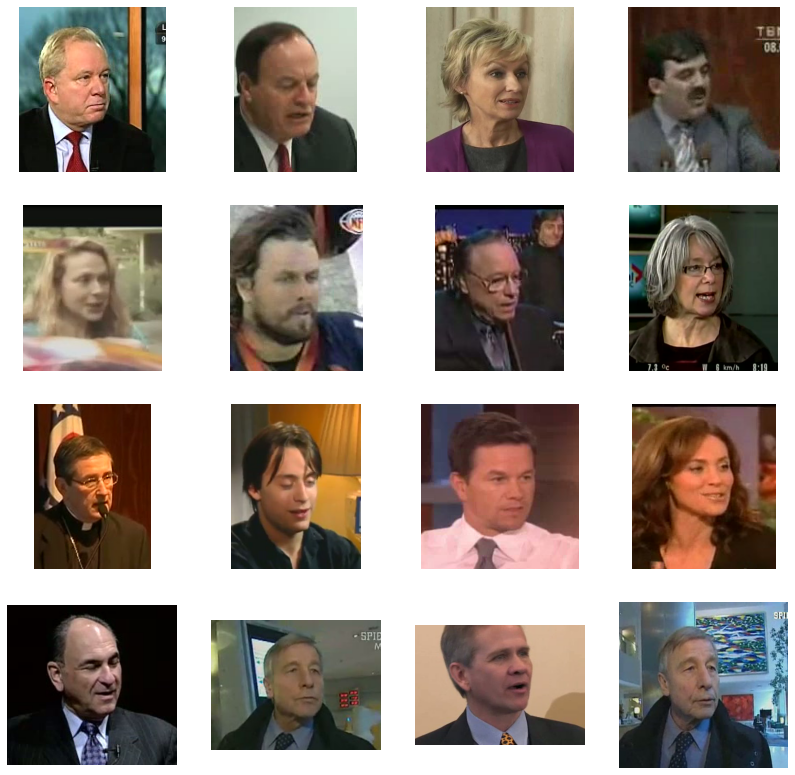

In [11]:
#%% show several original images that are assigned to a particular cluster
selectedCluster = 12
numRows = 4; numCols = 4;

shapeIndsAssignedToCluster = np.nonzero(clusterAssignment == selectedCluster)[0]
listOfShapeInds = np.random.choice(shapeIndsAssignedToCluster ,size=numRows*numCols,replace=False)

plt.figure(figsize=(14,14))
for i, shapeInd in enumerate(listOfShapeInds):
    # load video and pickout the relevent frame
    videoID  = shapeIndToVideoID[shapeInd][0]
    frameInd = shapeIndToVideoID[shapeInd][1]    
    videoFile = np.load(fullPaths[videoID])
    image = videoFile['colorImages'][:,:,:,frameInd]
    
    # show the image
    plt.subplot(numRows,numCols,i+1);
    plt.imshow(image); plt.axis('off')

We can see that all of those images have similar face poses, which was exactly the goal.

## Now look to the Right (Cluster 1)
(their right, it's our left)

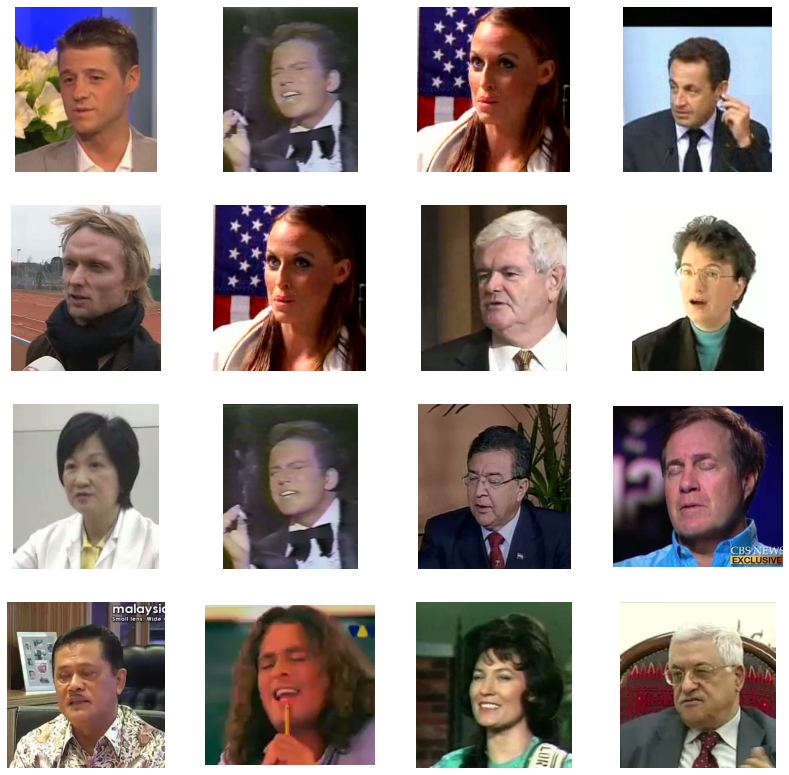

In [12]:
#%% show several original images that are assigned to a particular cluster
selectedCluster = 1
numRows = 4; numCols = 4;

shapeIndsAssignedToCluster = np.nonzero(clusterAssignment == selectedCluster)[0]
listOfShapeInds = np.random.choice(shapeIndsAssignedToCluster ,size=numRows*numCols,replace=False)

plt.figure(figsize=(14,14))
for i, shapeInd in enumerate(listOfShapeInds):
    # load video and pickout the relevent frame
    videoID  = shapeIndToVideoID[shapeInd][0]
    frameInd = shapeIndToVideoID[shapeInd][1]    
    videoFile = np.load(fullPaths[videoID])
    image = videoFile['colorImages'][:,:,:,frameInd]
    
    # show the image
    plt.subplot(numRows,numCols,i+1);
    plt.imshow(image); plt.axis('off')